In [56]:
# Import packages and libraries

import scipy
import sklearn
import plotly
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import missingno as msno
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.svm import SVC
from vecstack import stacking
from matplotlib import rcParams
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler, Normalizer, scale
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, log_loss, cohen_kappa_score, balanced_accuracy_score

warnings.filterwarnings("ignore")

%matplotlib inline

# Data Exploration

In [57]:
# Import and get to know the data

df = pd.read_excel("heart.xlsx")
number_of_rows, number_of_columns = df.shape
print(f"Dataset contains {number_of_rows} rows and {number_of_columns} columns")

Dataset contains 303 rows and 59 columns


In [58]:
print(f"Dataset contains such columns: \n{df.columns}")

Dataset contains such columns: 
Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')


In [59]:
df.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

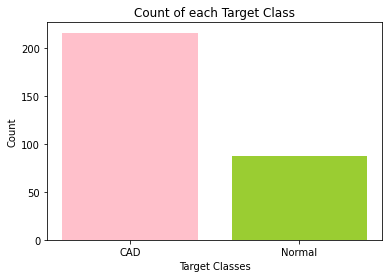

In [61]:
# Illustration balance of the target variable
target_unique = df["Cath"].unique()
target_count = df["Cath"].value_counts()
plt.bar(target_unique, target_count, color = ['pink', 'yellowgreen'])
plt.title("Count of each Target Class")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

# Data Encoding

In [62]:
# Checking a data type
df.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             object
LowTH Ang 

In [63]:
# Replacing yes/no values categorical values to 1/0 numeric values

def replace_categorical_to_numeric(data_row):
    for column in df.columns:
        if data_row[column] == "N":
            data_row[column] = 0
        if data_row[column] == "Y":
            data_row[column] = 1
    return data_row

Y_RCA = df["RCA"].replace({"Normal": 0, "Stenotic": 1})
Y_LAD = df["LAD"].replace({"Normal": 0, "Stenotic": 1})
Y_LCX = df["LCX"].replace({"Normal": 0, "Stenotic": 1})

df = df.drop(labels = ["Exertional CP", "RCA", "LCX", "LAD"], axis = 1)

# Replacing other categorical values to numeric values

df["BBB"] = df["BBB"].replace({"RBBB": 2, "LBBB": 1})
df["Sex"] = df['Sex'].replace({"Fmale": 0, "Male": 1})
df["VHD"] = df["VHD"].replace({"N": 0, "mild": 1, "Severe": 2, "Moderate": 3})
df["Cath"] = df["Cath"].replace({"Normal": 0, "CAD": 1})

df = df.apply(replace_categorical_to_numeric, axis = 1)

In [64]:
# Checking a data type after encoding

df.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                        int64
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                    int64
CRF                        int64
CVA                        int64
Airway disease             int64
Thyroid Disease            int64
CHF                        int64
DLP                        int64
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse      int64
Lung rales                 int64
Systolic Murmur            int64
Diastolic Murmur           int64
Typical Chest Pain         int64
Dyspnea                    int64
Function Class             int64
Atypical                   int64
Nonanginal                 int64
LowTH Ang                  int64
Q Wave    

# Data Cleaning

In [19]:
# Checking and replacing missing values with median

df = df.fillna(df.median())
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
BBB                      0
F

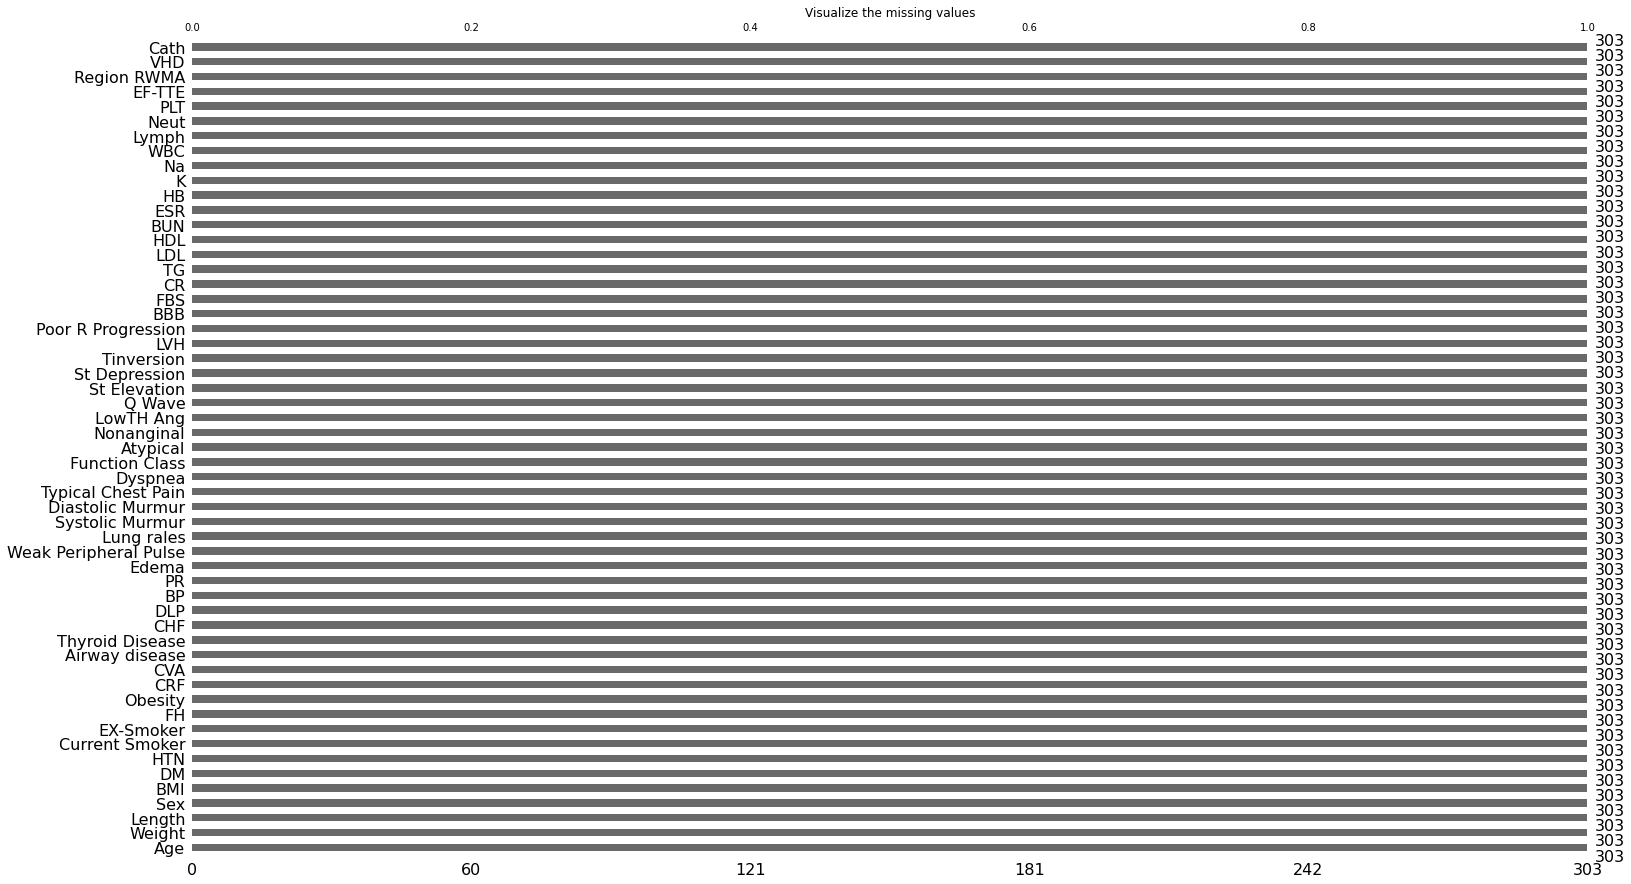

In [20]:
# Visualization missing values

msno.bar(df)
plt.title('Visualize the missing values')
plt.show()

In [21]:
# Checking for duplicate rows

print(f"Dataset contains {df.duplicated().sum()} duplicated rows")

Dataset contains 0 duplicated rows


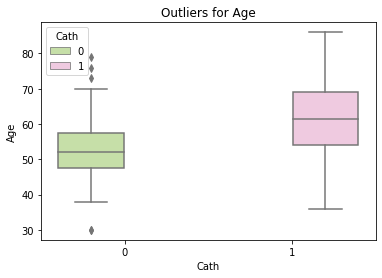

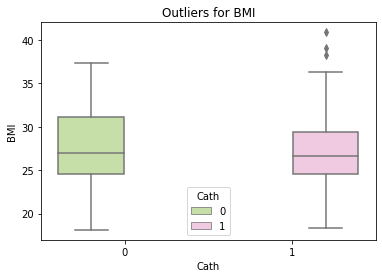

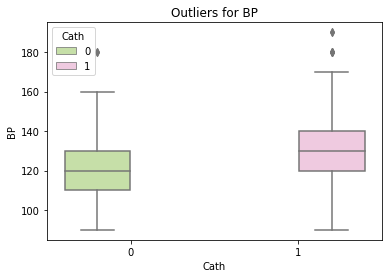

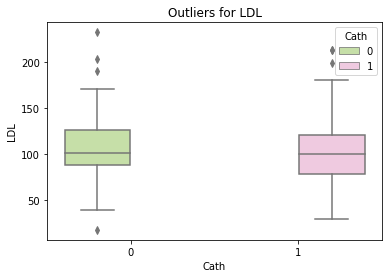

In [22]:
# Visyaliztion of outliers

columns = ["Age", "BMI", "BP", "LDL"]
for column in columns:
    plt.title(f"Outliers for {column}")
    sns.boxplot(x="Cath", y=column, hue="Cath", data=df, palette='PiYG_r')
    plt.show()

In [23]:
# Checking and removing outliers

df_numeric_data_values = df.select_dtypes(include="number")
z_scores = np.abs(stats.zscore(df_numeric_data_values))
print("Z-Scores:")
print(df_numeric_data_values)
df = df[(z_scores < 5).all(axis=1)]

Z-Scores:
     Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0     53      90     175    1  29.387755   0    1               1          0   
1     67      70     157    0  28.398718   0    1               0          0   
2     54      54     164    1  20.077335   0    0               1          0   
3     66      67     158    0  26.838648   0    1               0          0   
4     50      87     153    0  37.165193   0    1               0          0   
..   ...     ...     ...  ...        ...  ..  ...             ...        ...   
298   58      84     168    1  29.761905   0    0               0          0   
299   55      64     152    0  27.700831   0    0               0          0   
300   48      77     160    0  30.078125   0    1               0          0   
301   57      90     159    0  35.599858   1    0               0          0   
302   56      85     170    0  29.411765   0    1               1          0   

     FH  ...    K   Na    WBC

# Relationship and Distributions

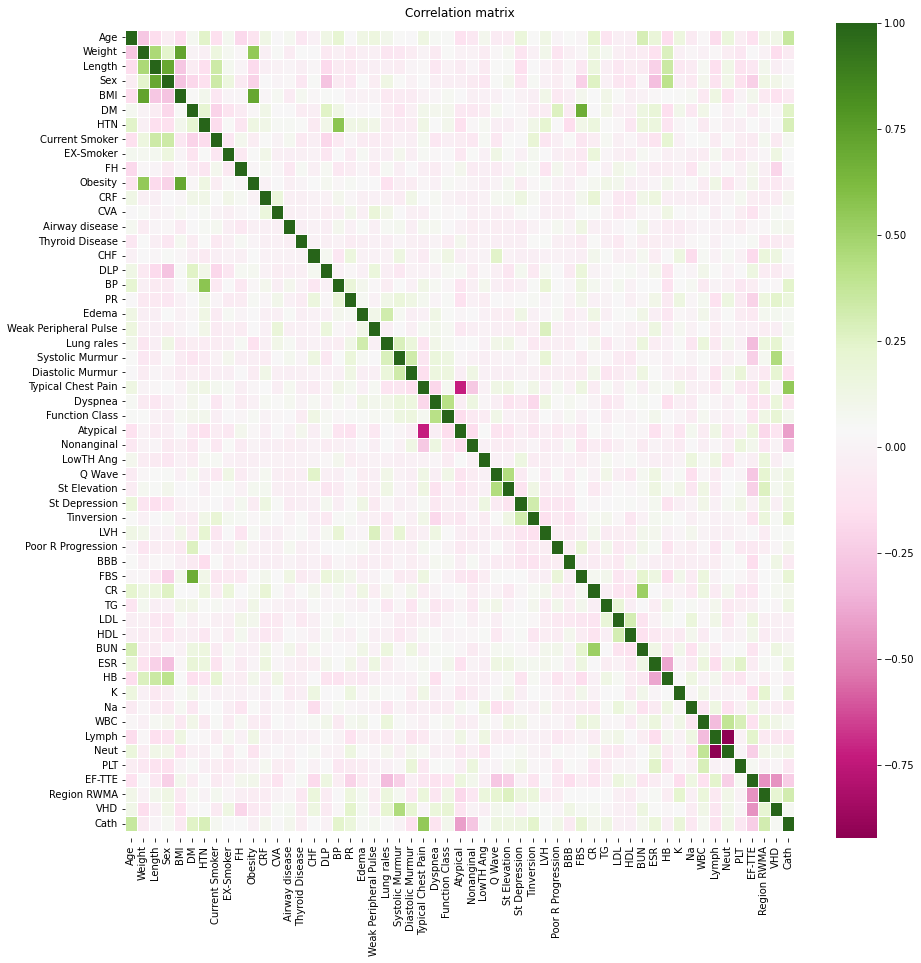

In [24]:
# Illustration of correlation matrix 

correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(correlation_matrix,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PiYG");
bottom_pagging, top_pagging = ax.get_ylim()
ax.set_ylim(bottom_pagging + 0.5, top_pagging - 0.5)
plt.title("Correlation matrix")
plt.show()

In [25]:
# Target variable distribution

print("Target variable distribution")
df[df.columns[:]].corr()["Cath"][:-1]

Target variable distribution


Age                      0.357247
Weight                  -0.066833
Length                   0.001024
Sex                      0.067041
BMI                     -0.078189
DM                       0.252897
HTN                      0.287761
Current Smoker           0.073504
EX-Smoker                0.035578
FH                       0.035605
Obesity                 -0.022461
CRF                      0.090205
CVA                      0.024946
Airway disease           0.084179
Thyroid Disease         -0.048077
CHF                      0.036520
DLP                     -0.012718
BP                       0.237762
PR                       0.168366
Edema                    0.054069
Weak Peripheral Pulse    0.082207
Lung rales               0.045179
Systolic Murmur         -0.004856
Diastolic Murmur        -0.146777
Typical Chest Pain       0.542967
Dyspnea                 -0.125211
Function Class           0.097087
Atypical                -0.415922
Nonanginal              -0.274184
LowTH Ang     

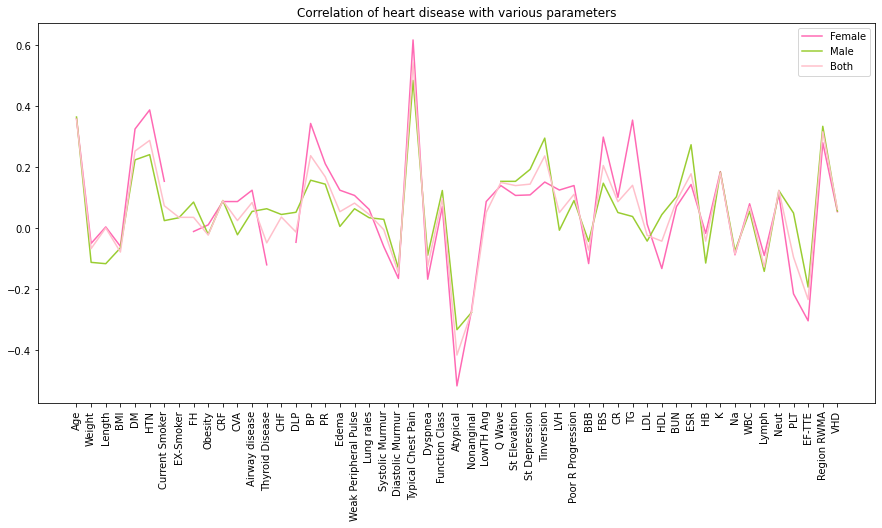

In [17]:
# Illustation correlation of heart disease with various parameters for different sex groups

sex_data = df["Sex"]
labels = ["Sex", "Cath"]
colors = ["hotpink", "yellowgreen", "pink"]

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df[sex_data==0].corr()["Cath"].drop(labels=labels), label="Female", color = colors[0])
ax.plot(df[sex_data==1].corr()["Cath"].drop(labels=labels), label="Male", color = colors[1])
ax.plot(df.corr()["Cath"].drop(labels=labels), label="Both", color = colors[2])
plt.title("Correlation of heart disease with various parameters")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [18]:
# Grouping sex and cath

print("Data grouped by Sex and Cath")
df.groupby(labels).count()

Data grouped by Sex and Cath


Age  Weight  Length  BMI   DM  HTN  Current Smoker  EX-Smoker   FH  \
Sex Cath                                                                       
0   0      41      41      41   41   41   41              41         41   41   
    1      86      86      86   86   86   86              86         86   86   
1   0      46      46      46   46   46   46              46         46   46   
    1     130     130     130  130  130  130             130        130  130   

          Obesity  ...   HB    K   Na  WBC  Lymph  Neut  PLT  EF-TTE  \
Sex Cath           ...                                                 
0   0          41  ...   41   41   41   41     41    41   41      41   
    1          86  ...   86   86   86   86     86    86   86      86   
1   0          46  ...   46   46   46   46     46    46   46      46   
    1         130  ...  130  130  130  130    130   130  130     130   

          Region RWMA  VHD  
Sex Cath                    
0   0              41   41  
    1              86   86  
1   0              46   46  
    1             130  130  

[4 rows x 53 columns]

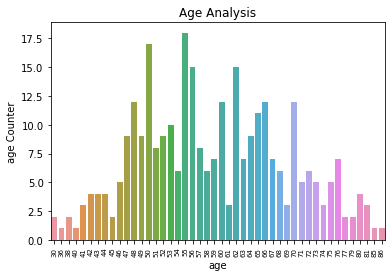

In [19]:
# Visualization age analysis

age_count = df["Age"].value_counts()
sns.barplot(x=age_count.index, y=age_count.values)
plt.xticks(rotation=90, fontsize=7)
plt.xlabel('age') 
plt.ylabel('age Counter')
plt.title('Age Analysis')
plt.show()

In [20]:
# Calculation of age range

df['age range'] = pd.cut(df["Age"], bins=[0, 40, 50, 60, 70, 100])

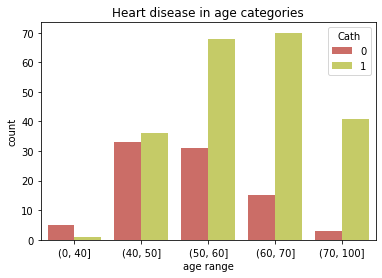

In [21]:
# Visualization correlation of heart disease anf different age categories

plt.title("Heart disease in age categories")
sns.set_palette("hls")
sns.countplot(df["age range"], hue="Cath", data=df)
plt.show()

In [22]:
# Grouping sex, cath and age range

df.groupby(["age range", "Sex", 'Cath'])["Age"].count()

age range  Sex  Cath
(0, 40]    0    0        1
                1        1
           1    0        4
                1        0
(40, 50]   0    0       15
                1       13
           1    0       18
                1       23
(50, 60]   0    0       13
                1       25
           1    0       18
                1       43
(60, 70]   0    0       12
                1       30
           1    0        3
                1       40
(70, 100]  0    0        0
                1       17
           1    0        3
                1       24
Name: Age, dtype: int64

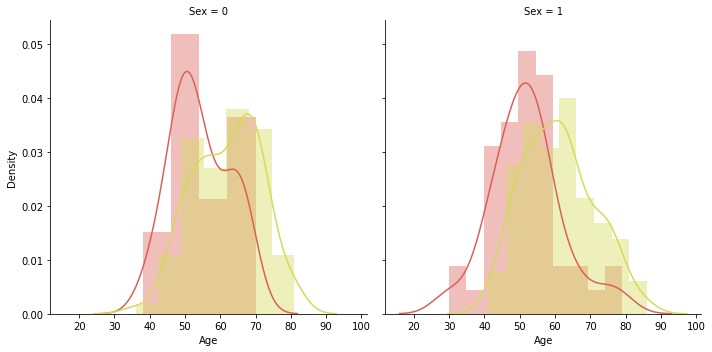

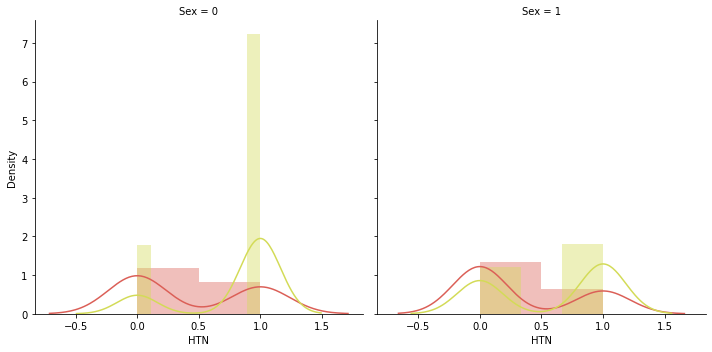

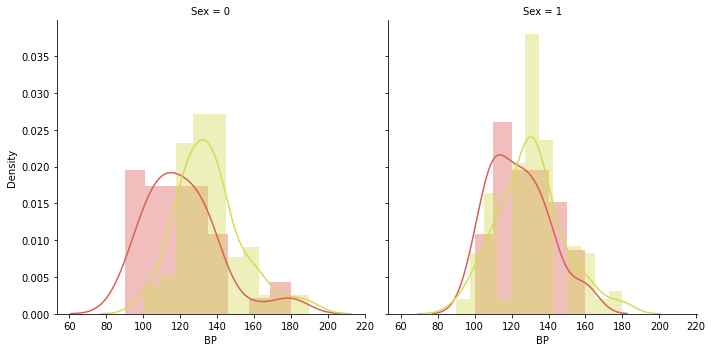

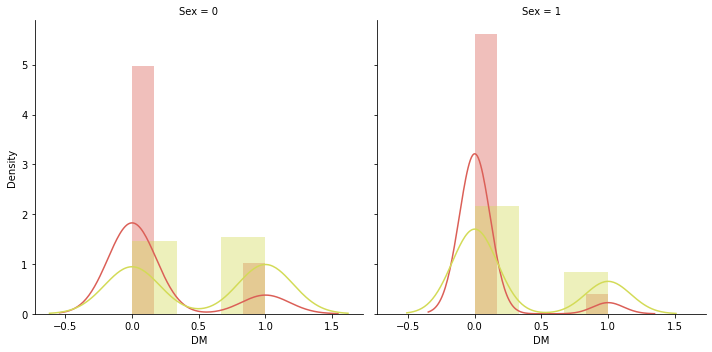

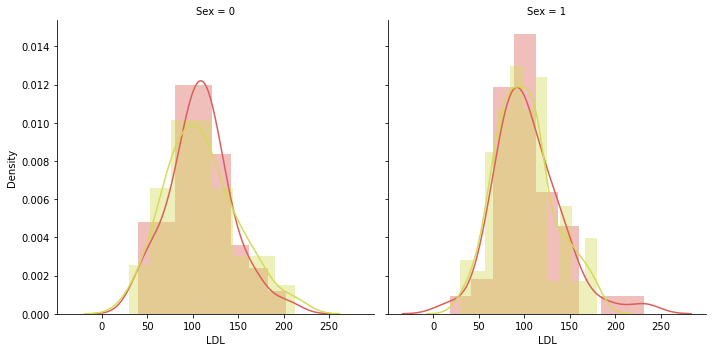

In [23]:
# Plotting seaborn graphics illustrated correlation between sex, cath and other attributes

columns = ["Age", "HTN", "BP", "DM", "LDL"]
for column in columns:
    face_grid = sns.FacetGrid(df, col="Sex", hue="Cath", height=5)
    face_grid.map(sns.distplot, column)

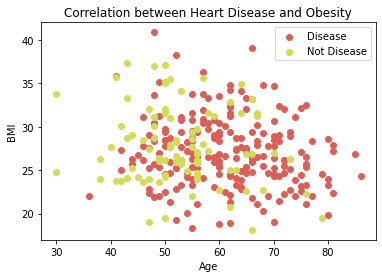

In [24]:
# Plotting correlation between Heart Disease and Obesity

plt.scatter(x=df.Age[df.Cath==1], y=df.BMI[(df.Cath==1)])
plt.scatter(x=df.Age[df.Cath==0], y=df.BMI[(df.Cath==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Correlation between Heart Disease and Obesity")
plt.show()

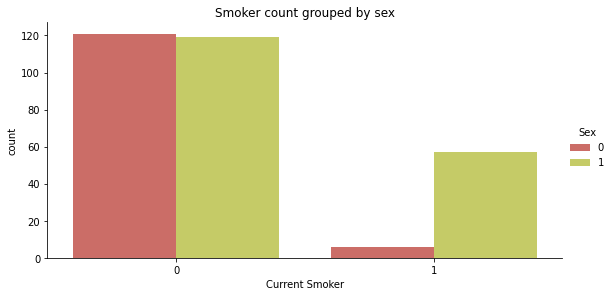

In [25]:
# Illustation number of smokers grouped by different sex types


sns.catplot(kind="count", data=df, x="Current Smoker", hue="Sex", height=4, aspect=2)
plt.title("Smoker count grouped by sex")
plt.show()

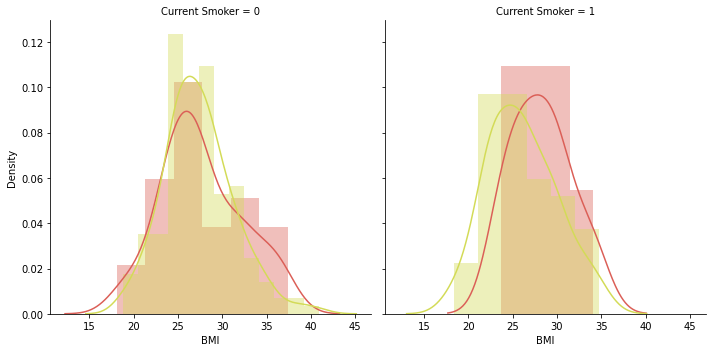

In [26]:
# Illustration dependency between smoking and overweight

face_grid = sns.FacetGrid(df, col="Current Smoker", hue="Cath", height=5)
face_grid.map(sns.distplot, "BMI")
plt.show()

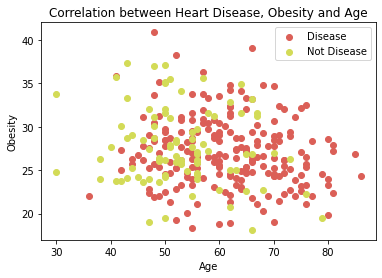

In [27]:
# Illustration dependency between smoking, obesity and age

plt.scatter(x=df.Age[df.Cath==1], y=df.BMI[(df.Cath==1)])
plt.scatter(x=df.Age[df.Cath==0], y=df.BMI[(df.Cath==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Obesity")
plt.title("Correlation between Heart Disease, Obesity and Age")
plt.show()

# Splitting Data

In [65]:
# Splitting data into test and train

def split_data_to_test_and_train(x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    Y_test = Y_test.reset_index()["Cath"]
    X_test = X_test.reset_index().iloc[:,1:]
    return X_train, X_test, Y_train, Y_test

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = split_data_to_test_and_train(x, y)
print(f"Data to train: \n{pd.value_counts(Y_train)}")
print(f"Data to test: \n{pd.value_counts(Y_test)}")

Data to train: 
1    173
0     69
Name: Cath, dtype: int64
Data to test: 
1    43
0    18
Name: Cath, dtype: int64


# Balancing the target variable

In [66]:
# Balancing Cath

target_class_weight = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
weights = {1:target_class_weight[1], 0: target_class_weight[0]}
print(f"Target variable classes balanced to {weights}")

Target variable classes balanced to {1: 0.6994219653179191, 0: 1.7536231884057971}


# Feature Selection

### Using Decision tree

In [28]:
feat = df.drop(['Cath'], axis=1)

des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", class_weight=weights, max_depth=20)
des_tree_clf.fit(X_train,Y_train)
des_tree_selector = SelectFromModel(des_tree_clf, prefit=True)
feature_idx = des_tree_selector.get_support()
feature_names = feat.columns[feature_idx]
print("Optimal features number - %d" % len(feature_names))
print("Features names:")
for feature_name in feature_names:
    print(feature_name)

Optimal features number - 12
Features names:
Age
Weight
HTN
Typical Chest Pain
Nonanginal
Poor R Progression
TG
LDL
BUN
HB
Lymph
Region RWMA


### Using RFECV

In [29]:
log_regression_clf = LogisticRegression(random_state=241,class_weight=weights)
log_regression_selector = RFECV(estimator=log_regression_clf, cv=5, scoring="neg_mean_squared_error")
log_regression_selector.fit(X_train, Y_train)
print("Optimal features number - %d" % log_regression_selector.n_features_)
feature_names = X_train.columns[log_regression_selector.support_]
print("Features names:")
for feature_name in feature_names:
    print(feature_name)

Optimal features number - 31
Features names:
Age
Sex
DM
HTN
EX-Smoker
FH
Obesity
CVA
Airway disease
DLP
Edema
Systolic Murmur
Diastolic Murmur
Typical Chest Pain
Dyspnea
Function Class
Atypical
Nonanginal
LowTH Ang
Q Wave
St Elevation
St Depression
Tinversion
LVH
Poor R Progression
BBB
CR
HB
K
Region RWMA
VHD


### Using SVM

In [30]:
svc_clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_train, Y_train)
svc_selector = SelectFromModel(svc_clf, prefit=True)
feature_idx = svc_selector.get_support()
feature_names = feat.columns[feature_idx]
print("Optimal features number - %d" % len(feature_names))
print("Features names:")
for feature_name in feature_names:
    print(feature_name)

Optimal features number - 26
Features names:
Age
Weight
Length
BMI
DM
HTN
FH
BP
PR
Typical Chest Pain
Dyspnea
Tinversion
FBS
TG
LDL
HDL
BUN
ESR
Na
WBC
Lymph
Neut
PLT
EF-TTE
Region RWMA
VHD


### Using PCA

In [31]:
pca = PCA(n_components=20)
pca.fit(X_train)
number_of_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(number_of_pcs)]
most_important_names = [feat.columns[most_important[i]] for i in range(number_of_pcs)]
print("Optimal features number - %d" % len(most_important_names))
print("Features names:")
for feature_name in most_important_names:
    print(feature_name)

Optimal features number - 20
Features names:
WBC
TG
PLT
FBS
LDL
BP
ESR
Neut
Weight
HDL
PR
Age
Length
Length
BUN
Na
Lymph
HB
Function Class
Region RWMA


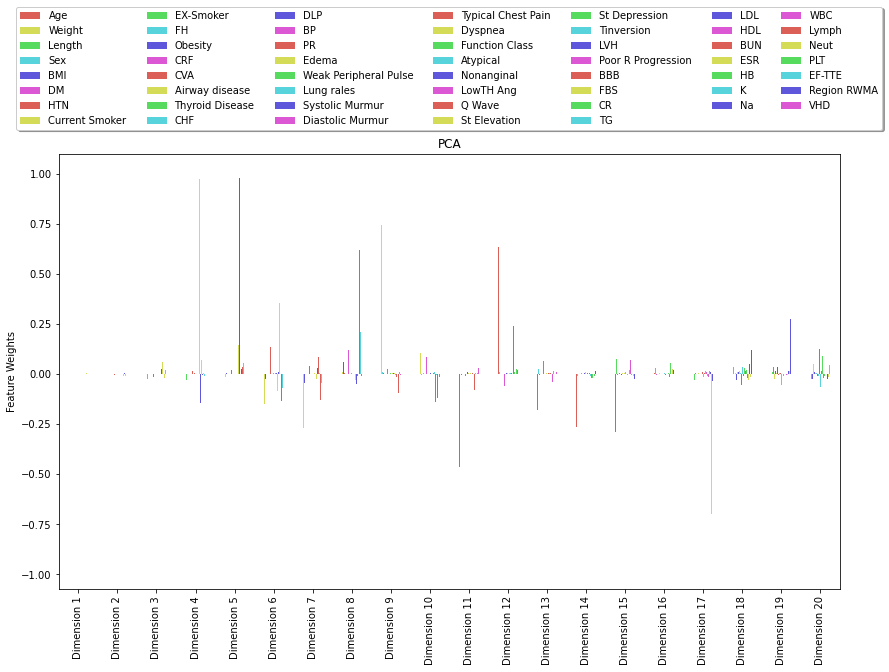

In [47]:
# Illustration PCA results

def calculate_and_show_pca_results(data, pca):
    dimension_indexing = ["Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)]
    pca_components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.keys()))
    pca_components.index = dimension_indexing
    pca_ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_pca_ratios = pd.DataFrame(np.round(pca_ratios, 4), columns = ['Explained Variance'])
    variance_pca_ratios.index = dimension_indexing
    fig, ax = plt.subplots(figsize = (14,8))
    pca_components.plot(ax=ax, kind="bar");
    plt.title("PCA")
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimension_indexing, rotation=90)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.35), ncol=7, fancybox=True, shadow=True)
    plt.show()
    concatenated_df = pd.concat([variance_pca_ratios, pca_components], axis = 1)
    return concatenated_df

pca_results = calculate_and_show_pca_results(feat, pca)

In [32]:
# Creating a function for implementing logic for different feature selection methods

def select_features_by_pca(train, test, returnx):
    transformed_x = None
    pca = PCA(n_components=30)
    pca.fit(train)
    transformed_train = pca.transform(train)
    transformed_test = pca.transform(test)
    if returnx:
        transformed_x = pca.transform(x)
    return transformed_train, transformed_test, transformed_x
        
def select_features_by_decision_tree(train, test, returnx):
    transformed_x = None
    des_tree_clf = DecisionTreeClassifier(random_state=241, splitter = "random", class_weight=weights, max_depth=20)
    des_tree_clf.fit(train, Y_train)
    des_tree_model = SelectFromModel(des_tree_clf, prefit=True)
    transformed_train = des_tree_model.transform(train)
    transformed_test = des_tree_model.transform(test)
    if returnx:
        transformed_x = des_tree_model.transform(x)
    return transformed_train, transformed_test, transformed_x

def select_features_by_rfecv(train, test, returnx):
    transformed_x = None
    rfecv_clf = LogisticRegression(random_state=241, class_weight=weights)
    selector = RFECV(estimator=rfecv_clf, cv=5, scoring="neg_mean_squared_error")
    selector.fit(train, Y_train)
    transformed_train = selector.transform(train)
    transformed_test = selector.transform(test)
    if returnx:
        transformed_x = selector.transform(x)
    return transformed_train, transformed_test, transformed_x
    
def select_features_by_svm(train, test, returnx):
    transformed_x = None
    svc_clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, Y_train)
    svc_model = SelectFromModel(svc_clf, prefit=True)
    transformed_train = svc_model.transform(train)
    transformed_test = svc_model.transform (test)
    if returnx:
        transformed_x = svc_model.transform(x)
    return transformed_train, transformed_test, transformed_x
 
feature_selection_switcher = {
    "decision_tree": select_features_by_decision_tree,
    "rfecv": select_features_by_rfecv,
    "svm": select_features_by_svm,
    "pca": select_features_by_pca,
}

def feature_selection(feature_selection_method, train = X_train, test = X_test, returnx = False):
    func = feature_selection_switcher.get(feature_selection_method, None)
    if not func:
        print("Invalid feature selection method")
    transformed_train, transformed_test, transformed_x = func(train, test, returnx)
    if returnx:
        return transformed_train, transformed_test, transformed_x
    return transformed_train, transformed_test


feature_selection_list = ["decision_tree", "rfecv", "svm", "pca"]

# Scaling Data

In [33]:
# Creating a function for scaling data by minmax or stand

def scale_by_minmax(train, test):
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    train = minmax_scaler.fit_transform(train)
    test = minmax_scaler.transform(test)
    return train, test
     
def scale_by_stand(train, test):
    train = scale(train)
    test = scale(test)
    return train, test

scaling_switcher = {
    "minmax": scale_by_minmax,
    "stand": scale_by_stand,
}

def scaling_data(train, test, scaling_method):
    func = scaling_switcher.get(scaling_method, None)
    if not func:
        print("Invalid scaling method")
    train, test = func(train, test)
    return train, test

scaling_list = ['minmax','stand']

# Estimation

In [233]:
# Creating a function for models estimation

def estimate_results(results, flag=None):
    TP = FP = TN = FN = 0
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            if results[i] == 1:
                TP+=1
            else:
                FN+=1
        if Y_test[i] == 0:
            if results[i] == 1:
                FP+=1
            else:
                TN+=1
    print(f"Accuracy - {int(accuracy_score(Y_test, results)*100)}%")
    print(f"Recall - {int(recall_score(Y_test, results)*100)}%")
    print(f"Precision - {int(precision_score(Y_test, results)*100)}%")
    print(f"F1-Score - {int(f1_score(Y_test, results)*100)}%")
    print(f"Cohen's kappa - {int(cohen_kappa_score(Y_test, results)*100)}%")

# Basic Classifiers Results

### Using Logistic regression

In [45]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
print("No feature selection (initial dataset)\n")
log_res_clf = LogisticRegression(solver='newton-cg')
weights = np.linspace(0.0,0.99,200)
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
gridsearch = GridSearchCV(estimator= log_res_clf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(),  
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, Y_train)
log_res_clf.fit(X_train, Y_train)
results = gridsearch.predict(X_test)
estimate_results(results)

No feature selection (initial dataset)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Accuracy - 87%
Recall - 93%
Precision - 89%
F1-Score - 91%
Cohen's kappa - 67%


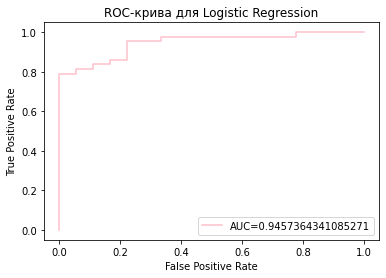

In [86]:
log_res_clf_pred = log_res_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  log_res_clf_pred)
auc = metrics.roc_auc_score(Y_test, log_res_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc), color="pink")
plt.title("ROC-крива для Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [49]:
log_res_clf= LogisticRegression(solver='newton-cg')
print("Using feature selection and scaling\n")
for feature_selection_method in feature_selection_list:
    for scaling_method in scaling_list:
        print (f"Feature selection method - {feature_selection_method}")
        print (f"Scaling method - {scaling_method}")
        scaled_X_train, scaled_X_test = scaling_data(X_train, X_test, scaling_method)
        train, test = feature_selection(feature_selection_method, scaled_X_train, scaled_X_test)
        log_res_clf.fit(train, Y_train)
        results = log_res_clf.predict(test)
        estimate_results(results)
        print('\n')

Using feature selection and scaling

Feature selection method - decision_tree
Scaling method - minmax
Accuracy - 89%
Recall - 91%
Precision - 93%
F1-Score - 92%
Cohen's kappa - 75%

Feature selection method - decision_tree
Scaling method - stand
Accuracy - 90%
Recall - 88%
Precision - 97%
F1-Score - 93%
Cohen's kappa - 70%

Feature selection method - rfecv
Scaling method - minmax
Accuracy - 87%
Recall - 91%
Precision - 91%
F1-Score - 91%
Cohen's kappa - 74%

Feature selection method - rfecv
Scaling method - stand
Accuracy - 89%
Recall - 86%
Precision - 97%
F1-Score - 91%
Cohen's kappa - 76%

Feature selection method - svm
Scaling method - minmax
Accuracy - 87%
Recall - 91%
Precision - 91%
F1-Score - 91%
Cohen's kappa - 74%

Feature selection method - svm
Scaling method - stand
Accuracy - 85%
Recall - 88%
Precision - 90%
F1-Score - 89%
Cohen's kappa - 67%

Feature selection method - pca
Scaling method - minmax
Accuracy - 90%
Recall - 91%
Precision - 95%
F1-Score - 93%
Cohen's kappa - 66

### Using Naive Bayes

In [235]:
print("No feature selection (initial dataset)\n")
bayes_clf = BernoulliNB()
bayes_clf.fit(X_train, Y_train)
results = bayes_clf.predict(X_test)
estimate_results(results)

No feature selection (initial dataset)

Accuracy - 83%
Recall - 90%
Precision - 86%
F1-Score - 88%
Cohen's kappa - 59%


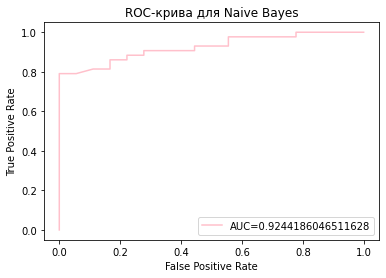

In [243]:
bayes_clf_pred = bayes_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  bayes_clf_pred)
auc = metrics.roc_auc_score(Y_test, bayes_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc), color="pink")
plt.title("ROC-крива для Naive Bayes")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [236]:
print("Using feature selection and scaling\n")
for feature_selection_method in feature_selection_list:
    for scaling_method in scaling_list:
        print (f"Feature selection method - {feature_selection_method}")
        print (f"Scaling method - {scaling_method}")
        scaled_X_train, scaled_X_test = scaling_data(X_train, X_test, scaling_method)
        train, test = feature_selection(feature_selection_method, scaled_X_train, scaled_X_test)
        bayes_clf.fit(train, Y_train)
        results = bayes_clf.predict(test)
        estimate_results(results)
        print('\n')

Using feature selection and scaling

Feature selection method - decision_tree
Scaling method - minmax
Accuracy - 85%
Recall - 95%
Precision - 85%
F1-Score - 90%
Cohen's kappa - 61%


Feature selection method - decision_tree
Scaling method - stand
Accuracy - 83%
Recall - 95%
Precision - 83%
F1-Score - 89%
Cohen's kappa - 56%


Feature selection method - rfecv
Scaling method - minmax
Accuracy - 85%
Recall - 90%
Precision - 88%
F1-Score - 89%
Cohen's kappa - 63%


Feature selection method - rfecv
Scaling method - stand
Accuracy - 90%
Recall - 95%
Precision - 91%
F1-Score - 93%
Cohen's kappa - 75%


Feature selection method - svm
Scaling method - minmax
Accuracy - 83%
Recall - 90%
Precision - 86%
F1-Score - 88%
Cohen's kappa - 59%


Feature selection method - svm
Scaling method - stand
Accuracy - 86%
Recall - 93%
Precision - 88%
F1-Score - 90%
Cohen's kappa - 67%


Feature selection method - pca
Scaling method - minmax
Accuracy - 72%
Recall - 86%
Precision - 77%
F1-Score - 81%
Cohen's kapp

### Using Decision Tree

In [50]:
print("No feature selection (initial dataset)\n")
des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", class_weight=weights, max_depth=20)
des_tree_clf.fit(X_train, Y_train)
results = des_tree_clf.predict(X_test)
estimate_results(results)

No feature selection (initial dataset)

Accuracy - 82%
Recall - 86%
Precision - 88%
F1-Score - 87%
Cohen's kappa - 58%


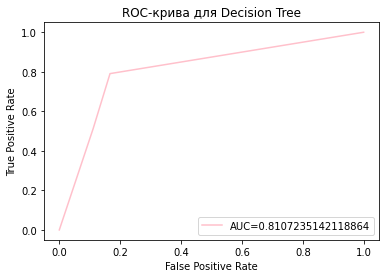

In [106]:
des_tree_pred = des_tree_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  des_tree_pred)
auc = metrics.roc_auc_score(Y_test, des_tree_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc), color="pink")
plt.title("ROC-крива для Decision Tree")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", class_weight={0:0.5, 1:0.5}, max_depth=20)
print("Using feature selection and scaling\n")
for feature_selection_method in feature_selection_list:
    for scaling_method in scaling_list:
        print (f"Feature selection method - {feature_selection_method}")
        print (f"Scaling method - {scaling_method}")
        scaled_X_train, scaled_X_test = scaling_data(X_train, X_test, scaling_method)
        train, test = feature_selection(feature_selection_method, scaled_X_train, scaled_X_test)
        des_tree_clf.fit(train, Y_train)
        results = des_tree_clf.predict(test)
        estimate_results(results)
        print('\n')

Using feature selection and scaling

Feature selection method - decision_tree
Scaling method - minmax
Accuracy - 89%
Recall - 91%
Precision - 91%
F1-Score - 91%
Cohen's kappa - 66%

Feature selection method - decision_tree
Scaling method - stand
Accuracy - 85%
Recall - 88%
Precision - 90%
F1-Score - 89%
Cohen's kappa - 71%

Feature selection method - rfecv
Scaling method - minmax
Accuracy - 82%
Recall - 88%
Precision - 86%
F1-Score - 87%
Cohen's kappa - 65%

Feature selection method - rfecv
Scaling method - stand
Accuracy - 80%
Recall - 88%
Precision - 84%
F1-Score - 86%
Cohen's kappa - 74%

Feature selection method - svm
Scaling method - minmax
Accuracy - 84%
Recall - 93%
Precision - 85%
F1-Score - 89%
Cohen's kappa - 59%

Feature selection method - svm
Scaling method - stand
Accuracy - 84%
Recall - 93%
Precision - 85%
F1-Score - 89%
Cohen's kappa - 59%

Feature selection method - pca
Scaling method - minmax
Accuracy - 70%
Recall - 77%
Precision - 80%
F1-Score - 79%
Cohen's kappa - 72

### Using SGD

In [52]:
print("No feature selection (initial dataset)\n")
parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 0.01, 0.1, 1, 10]}
cv=KFold(y.size, shuffle = True, random_state=241)
svc = SVC(class_weight= weights)
sgd_clf = SGDClassifier(max_iter=10000, loss='hinge', class_weight=weights)
sgd_clf.fit(X_train, Y_train)
results = sgd_clf.predict(X_test)
estimate_results(results)

No feature selection (initial dataset)

Accuracy - 72%
Recall - 86%
Precision - 77%
F1-Score - 81%
Cohen's kappa - 53%


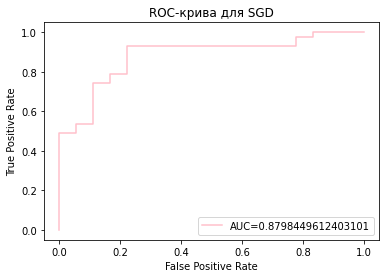

In [136]:
calibrator = CalibratedClassifierCV(sgd_clf, cv='prefit')
sgd_clf = calibrator.fit(X_train,Y_train)
sgd_pred = sgd_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  sgd_pred)
auc = metrics.roc_auc_score(Y_test, sgd_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc), color="pink")
plt.title("ROC-крива для SGD")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [53]:
sgd_clf = GaussianNB()
print("Using feature selection and scaling\n")
for feature_selection_method in feature_selection_list:
    for scaling_method in scaling_list:
        print (f"Feature selection method - {feature_selection_method}")
        print (f"Scaling method - {scaling_method}")
        scaled_X_train, scaled_X_test = scaling_data(X_train, X_test, scaling_method)
        train, test = feature_selection(feature_selection_method, scaled_X_train, scaled_X_test)
        sgd_clf.fit(train, Y_train)
        results = sgd_clf.predict(test)
        estimate_results(results)
        print('\n')

Using feature selection and scaling

Feature selection method - decision_tree
Scaling method - minmax
Accuracy - 80%
Recall - 94%
Precision - 80%
F1-Score - 87%
Cohen's kappa - 58%

Feature selection method - decision_tree
Scaling method - stand
Accuracy - 87%
Recall - 91%
Precision - 91%
F1-Score - 91%
Cohen's kappa - 57%

Feature selection method - rfecv
Scaling method - minmax
Accuracy - 89%
Recall - 88%
Precision - 88%
F1-Score - 92%
Cohen's kappa - 64%

Feature selection method - rfecv
Scaling method - stand
Accuracy - 84%
Recall - 88%
Precision - 88%
F1-Score - 88%
Cohen's kappa - 56%

Feature selection method - svm
Scaling method - minmax
Accuracy - 77%
Recall - 94%
Precision - 77%
F1-Score - 85%
Cohen's kappa - 52%

Feature selection method - svm
Scaling method - stand
Accuracy - 87%
Recall - 88%
Precision - 93%
F1-Score - 90%
Cohen's kappa - 53%

Feature selection method - pca
Scaling method - minmax
Accuracy - 89%
Recall - 91%
Precision - 93%
F1-Score - 92%
Cohen's kappa - 57

# Basic Ensembles Results

### Using Random Forest

In [54]:
random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=9, random_state=41)
random_forest_clf.fit(X_train, Y_train)
results = random_forest_clf.predict(X_test)
estimate_results(results)

Accuracy - 90%
Recall - 94%
Precision - 89%
F1-Score - 93%
Cohen's kappa - 71%


### Using XGBoost

In [68]:
results = []
number_of_rounds = 5
d_train = xgb.DMatrix(X_train, label=Y_train)
d_test = xgb.DMatrix(X_test, label = Y_test)
params = {"eta": 1, "objective": "binary:logistic", "max_depth": 2, "nthread": 4, "eval_metric": "auc"}
eval_list = [(d_test, "eval"), (d_train, "train")]
bst = xgb.train(params, d_train, number_of_rounds, eval_list)
y_pred = bst.predict(d_test)
log_loss(Y_test, y_pred)
for i in range(len(y_pred)):
    if y_pred[i]<0.5:
        results.append(0)
    else:
        results.append(1)
estimate_results(results)

[0]	eval-auc:0.83721	train-auc:0.87568
[1]	eval-auc:0.85271	train-auc:0.93210
[2]	eval-auc:0.86499	train-auc:0.95736
[3]	eval-auc:0.92506	train-auc:0.97018
[4]	eval-auc:0.92700	train-auc:0.98094
Accuracy - 84%
Recall - 93%
Precision - 85%
F1-Score - 89%
Cohen's kappa - 68%


### Using Bagging

In [72]:
logistic_regression = LogisticRegression(random_state=241,class_weight=weights)
naive_bayes = BernoulliNB()
decision_tree = DecisionTreeClassifier(random_state=241, splitter='random')
random_forest= RandomForestClassifier(n_estimators=20, max_depth=10,random_state=41)
models = [('nb', naive_bayes),('LogReg', logistic_regression), ('DT', decision_tree),('RF',random_forest)]
aggregated_weights = [0.89,0.93,0.91,0.89] #f1_scores minmax

scaled_X_train, scaled_X_test = scaling_data(X_train, X_test, 'minmax')
train,test = feature_selection("decision_tree", scaled_X_train, scaled_X_test)
hard_voting = VotingClassifier(estimators=models, voting='hard')
hard_voting_fit = hard_voting.fit(train, Y_train)
hard_voting_results = hard_voting_fit.predict(test)
soft_voting = VotingClassifier(estimators=models,voting='soft')
soft_voting_fit = soft_voting.fit(train, Y_train)
soft_voting_results = soft_voting_fit.predict(test)
print("Results with Hard Voting")
print(f"{estimate_results(hard_voting_results)}\n")
print("Results with Soft Voting")
print(f"{estimate_results(soft_voting_results)}\n")

Results with Hard Voting
Accuracy - 89%
Recall - 91%
Precision - 93%
F1-Score - 92%
Cohen's kappa - 72%

Results with Soft Voting
Accuracy - 88%
Recall - 90%
Precision - 94%
F1-Score - 92%
Cohen's kappa - 71%


# Proposed Modified Method Results

### First level

In [74]:
first_level_models = [SGDClassifier(max_iter=10000, loss='hinge', class_weight=weights),
                      XGBClassifier(random_state=41, n_estimators=20, max_depth=2, nthread=4, objective='binary:logistic')]

blend_params = {'C':[1000],'tol':[0.01]} # test more values in your local machine
stack_model = GridSearchCV(LogisticRegression(solver='newton-cg', multi_class='multinomial'), blend_params, refit='True', n_jobs=-1, cv=5)
stack_estimates = stack_model.fit(X_train,Y_train)
print(f"The Best parameters for blending models: {stack_model.best_params_}")
print(f"The best score: {stack_model.best_score_}\n")
S_train, S_test = stacking(first_level_models, train, Y_train, test, regression=False, 
                           mode='oof_pred_bag', needs_proba=False, save_dir=None,
                           metric=accuracy_score, n_folds=4, stratified=True, 
                           shuffle=True, random_state=241, verbose=2) 
stack_model_fit = stack_model.fit(S_train, Y_train)
stack_results = stack_model_fit.predict(S_test)
estimate_results(stack_results, "final_first")

Accuracy - 90%
Recall - 93%
Precision - 93%
F1-Score - 93%
Cohen's kappa - 66%


### Second level

In [76]:
naive_bayes.fit(train, Y_train)
naive_bayes_results = naive_bayes.predict(test)
decision_tree.fit(train, Y_train)
decision_tree_results = decision_tree.predict(test)
f1_weights = {"NB": 0.89, "DT": 0.91, "ST": 0.93}
bagging_results = (f1_weights["NB"]*naive_bayes_results + f1_weights["DT"]*decision_tree_results  + f1_weights["ST"]*stack_results)/3
final_results = []
for i in range(len(bagging_results)):
    if bagging_results[i] < 0.5:
        final_results.append(0)
    else:
        final_results.append(1)
estimate_results(final_results, "final_second")

Accuracy - 92%
Recall - 95%
Precision - 93%
F1-Score - 94%
Cohen's kappa - 76%
